In [530]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [531]:
df = pd.read_csv(r"E:/DataScientist/DS-Used-Car-Price-Prediction/data/Cardetails.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [532]:
df.shape
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [534]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [535]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [536]:
df.dropna(inplace=True)

In [537]:
df.duplicated().sum()

1189

In [538]:
df.drop_duplicates(inplace=True)

In [539]:
df.shape

(6717, 13)

In [540]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [541]:
df1 = df.drop(columns=["max_power","torque"])

In [542]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,5.0


In [543]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 629.7+ KB


In [544]:
for col in df1.columns:
    print(col)
    print(df1[col].unique())
    print("========================================")

name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000   290000
   455000   351000   535000   175000   5650

In [545]:
def get_carBrandNames(carName):
    carName = carName.strip(' ')
    carName = carName.split(' ')[0]
    return carName

def get_first(inp):
    inp = inp.strip(' ')
    inp = inp.split(' ')[0]
    return inp


In [546]:
df1['name'] = df1['name'].apply(get_carBrandNames)
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,5.0
8122,Hyundai,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,5.0
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,5.0


In [547]:
df1['mileage'] = df1['mileage'].apply(get_first)
df1['engine'] = df1['engine'].apply(get_first)


In [548]:
for col in df1.columns:
    print(col)
    print(df1[col].unique())
    print("========================================")

name
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   

In [549]:
df1['mileage'] = df1['mileage'].astype(float)
df1['engine'] = df1['engine'].astype(float)

In [580]:
# df1.info()
df2 = df1.copy().reset_index(drop = True)
print(df2.columns)
df2.head(3)


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'seats'],
      dtype='object')


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5.0


In [551]:
df2['year'] = df2['year'].astype('int64')
df2['selling_price'] = df2['selling_price'].astype('float64')
df2['km_driven'] = df2['km_driven'].astype('float64')


In [592]:
df2.info()
dummyDataFrame = df2.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   float64
 10  seats          6717 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 577.4+ KB


In [553]:
df2.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,Maruti,2014,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,5.0
1,Skoda,2014,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5.0
2,Honda,2006,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5.0


In [554]:
df2.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'seats'],
      dtype='object')

### Enconding

In [555]:
categoriesCol = df2.select_dtypes(include=['object']).columns.tolist()
print(categoriesCol)

['name', 'fuel', 'seller_type', 'transmission', 'owner']


In [556]:
from sklearn.preprocessing import OneHotEncoder

In [557]:
ohe = OneHotEncoder(sparse_output=False)

In [558]:
encodedOHEArr = ohe.fit_transform(df2[categoriesCol])
encodedOHEDf = pd.DataFrame(encodedOHEArr,columns= ohe.get_feature_names_out(categoriesCol))


In [559]:
df3 = pd.concat([df2,encodedOHEDf],axis=1)
df4 = df3.drop(columns=categoriesCol)

df4

,year,selling_price,km_driven,mileage,engine,seats,name_Ambassador,name_Ashok,name_Audi,name_BMW,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000.0,145500.0,23.40,1248.0,5.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2014,370000.0,120000.0,21.14,1498.0,5.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2006,158000.0,140000.0,17.70,1497.0,5.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2010,225000.0,127000.0,23.00,1396.0,5.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,2007,130000.0,120000.0,16.10,1298.0,5.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,2013,260000.0,50000.0,18.90,998.0,5.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6713,2014,475000.0,80000.0,22.54,1396.0,5.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6714,2013,320000.0,110000.0,18.50,1197.0,5.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6715,2007,135000.0,119000.0,16.80,1493.0,5.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [560]:
len(df4.select_dtypes(include=['float','int']).columns.tolist())

51

<Axes: xlabel='seats', ylabel='Count'>

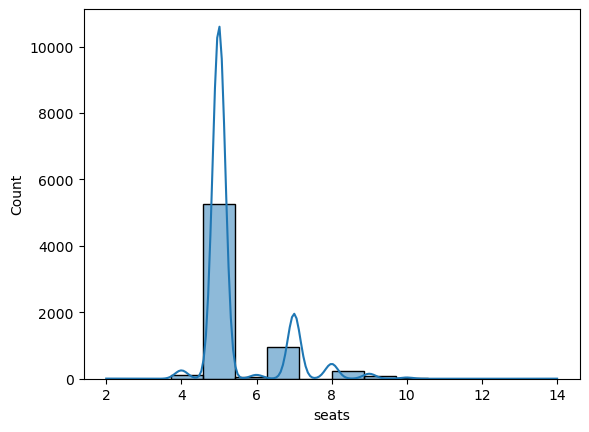

In [561]:
col = ['year',	'selling_price',	'km_driven',	'mileage'	,'engine'	,'seats']
# sns.pairplot(data=df[col])
sns.histplot(data=df['seats'],kde=True)

In [562]:
df4.columns

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'seats',
       'name_Ambassador', 'name_Ashok', 'name_Audi', 'name_BMW',
       'name_Chevrolet', 'name_Daewoo', 'name_Datsun', 'name_Fiat',
       'name_Force', 'name_Ford', 'name_Honda', 'name_Hyundai', 'name_Isuzu',
       'name_Jaguar', 'name_Jeep', 'name_Kia', 'name_Land', 'name_Lexus',
       'name_MG', 'name_Mahindra', 'name_Maruti', 'name_Mercedes-Benz',
       'name_Mitsubishi', 'name_Nissan', 'name_Opel', 'name_Renault',
       'name_Skoda', 'name_Tata', 'name_Toyota', 'name_Volkswagen',
       'name_Volvo', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

### Scaling - Standardization 

In [563]:
df5 = df4.copy()

scalingIndependentVar = ['year','km_driven','mileage','engine','seats']
scalingDF = df5[scalingIndependentVar]  ## Extracted Scaling coloumns  only needed so take it 
scalingDF
df6 = df5.drop(columns=scalingIndependentVar) ## 

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scalerArr = ss.fit_transform(scalingDF[scalingIndependentVar])
scaledDF = pd.DataFrame(scalerArr,columns=ss.get_feature_names_out(scalingIndependentVar))

df7 = pd.concat([scaledDF,df6],axis=1)
df7

,year,km_driven,mileage,engine,seats,selling_price,name_Ambassador,name_Ashok,name_Audi,name_BMW,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.099783,1.228331,0.971741,-0.370843,-0.441453,450000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.099783,0.793910,0.413413,0.135812,-0.441453,370000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-1.953020,1.134632,-0.436431,0.133786,-0.441453,158000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.926619,0.913163,0.872922,-0.070903,-0.441453,225000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,-1.696420,0.793910,-0.831707,-0.269512,-0.441453,130000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,-0.156818,-0.398616,-0.139973,-0.877498,-0.441453,260000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6713,0.099783,0.112467,0.759280,-0.070903,-0.441453,475000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6714,-0.156818,0.623549,-0.238793,-0.474200,-0.441453,320000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6715,-1.696420,0.776874,-0.658774,0.125679,-0.441453,135000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [564]:

input_data = df7.drop(columns=['selling_price'])
output_data = df7['selling_price']
print(input_data.shape)
print(output_data.shape)

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor  # 87+
from sklearn.ensemble import RandomForestRegressor  # 89+
from sklearn.svm import SVR 
from sklearn.ensemble import GradientBoostingRegressor #87+


(6717, 50)
(6717,)


In [565]:
# print(input_data.columns)

x_train, x_test, y_train, y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=42,shuffle=True)

In [566]:
model = KNeighborsRegressor(n_neighbors=4)
model.fit(x_train, y_train)

# model = GradientBoostingRegressor(random_state=0)
# model.fit(x_train, y_train)

# model =  RandomForestRegressor(random_state=0)
# model.fit(x_train,y_train)

print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.8677599637074338
0.852558171403603


In [567]:
for i in range(10):
    index = i
    data = x_test.iloc[index, :].values.tolist()
    # print(data)
    print()
    
    
    testing_data = pd.DataFrame([data],columns=['year', 'km_driven', 'mileage', 'engine', 'seats', 'name_Ambassador',
        'name_Ashok', 'name_Audi', 'name_BMW', 'name_Chevrolet', 'name_Daewoo',
        'name_Datsun', 'name_Fiat', 'name_Force', 'name_Ford', 'name_Honda',
        'name_Hyundai', 'name_Isuzu', 'name_Jaguar', 'name_Jeep', 'name_Kia',
        'name_Land', 'name_Lexus', 'name_MG', 'name_Mahindra', 'name_Maruti',
        'name_Mercedes-Benz', 'name_Mitsubishi', 'name_Nissan', 'name_Opel',
        'name_Renault', 'name_Skoda', 'name_Tata', 'name_Toyota',
        'name_Volkswagen', 'name_Volvo', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
        'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
        'seller_type_Trustmark Dealer', 'transmission_Automatic',
        'transmission_Manual', 'owner_First Owner',
        'owner_Fourth & Above Owner', 'owner_Second Owner',
        'owner_Test Drive Car', 'owner_Third Owner'])

    predicted_value = model.predict(testing_data)
    print("Predicted : ",predicted_value)


    actual_data_result = y_test.iloc[index]
    print("Actual : ",actual_data_result)


Predicted :  [1262500.]
Actual :  450000.0

Predicted :  [817500.]
Actual :  800000.0

Predicted :  [293500.]
Actual :  75000.0

Predicted :  [2437500.]
Actual :  3200000.0

Predicted :  [1787500.]
Actual :  1650000.0

Predicted :  [171250.]
Actual :  180000.0

Predicted :  [807499.75]
Actual :  1019999.0

Predicted :  [346250.]
Actual :  350000.0

Predicted :  [1737500.]
Actual :  722000.0

Predicted :  [280000.]
Actual :  315000.0


## HyperParameter Tunning

In [568]:
#GridSearchCV
# from sklearn.model_selection import GridSearchCV


In [569]:
# param_dist = {
#     'n_neighbors':[i for i in range(8)],
#      'weights':['distance'],
#       'algorithm':['ball_tree'],
#        'leaf_size':[i for i in range(5)], 
#        'p':[i for i in range(4)]
# }

# cv = GridSearchCV(KNeighborsRegressor(), param_dist, cv=5)
# cv.fit(x_train, y_train)

# print("Tuned Decision Tree Parameters: {}".format(cv.best_params_))
# print("Best score is {}".format(cv.best_score_))

In [570]:
# param_dist = {
#     'n_estimators':[i for i in range(5)],
#     'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
#      'max_depth':[i for i in range(8)],
#       'min_samples_split':[i for i in range(8)],
#        'min_samples_leaf':[i for i in range(4)],
#         'max_features':['sqrt', 'log2'], 
#         'max_leaf_nodes':[i for i in range(4)]
# }

# cv = GridSearchCV(RandomForestRegressor(), param_dist, cv=5)
# cv.fit(x_train, y_train)

# print("Tuned Decision Tree Parameters: {}".format(cv.best_params_))
# print("Best score is {}".format(cv.best_score_))

## Model Export

In [571]:
# import pickle as pkl

# pkl.dump(model,open("Model.pkl",'wb'))

In [572]:
dataFrame = df
dataFrame.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


In [573]:
# dataFrame['']

In [574]:
dataFrame['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [575]:
dataFrame['seller_type'].unique()


array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [581]:
dataFrame['transmission'].unique()


array(['Manual', 'Automatic'], dtype=object)

In [ ]:
carName = "BMW"
fuelType = "Disel"
sellerType = 'Indudial'
transmissionType = "Manaul"
manufactureYear = 2011
carOwner = 'First'
kmsDriven = 25000
carEngineCC = 1200
carMileage = 25
noOfSeats = 5

SELLING_PRICE = 0
InputDataDF = pd.DataFrame([[carName, manufactureYear, SELLING_PRICE, kmsDriven, fuelType, sellerType,transmissionType, carOwner, carMileage, carEngineCC, noOfSeats]],columns=['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type','transmission', 'owner', 'mileage', 'engine', 'seats'])


In [591]:
df2.head(1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1 non-null      object 
 1   year           1 non-null      int64  
 2   selling_price  1 non-null      int64  
 3   km_driven      1 non-null      int64  
 4   fuel           1 non-null      object 
 5   seller_type    1 non-null      object 
 6   transmission   1 non-null      object 
 7   owner          1 non-null      object 
 8   mileage        1 non-null      float64
 9   engine         1 non-null      float64
 10  seats          1 non-null      float64
dtypes: float64(3), int64(3), object(5)
memory usage: 220.0+ bytes


In [590]:
InputDataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1 non-null      object
 1   year           1 non-null      int64 
 2   selling_price  1 non-null      int64 
 3   km_driven      1 non-null      int64 
 4   fuel           1 non-null      object
 5   seller_type    1 non-null      object
 6   transmission   1 non-null      object
 7   owner          1 non-null      object
 8   mileage        1 non-null      int64 
 9   engine         1 non-null      int64 
 10  seats          1 non-null      int64 
dtypes: int64(6), object(5)
memory usage: 220.0+ bytes
